In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix,accuracy_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('/kaggle/input/heart-prediction-dataset-quantum/Heart Prediction Quantum Dataset.csv')
df.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [4]:
df.isnull().sum()

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

In [5]:
continuous_variable = ['Age','BloodPressure','Cholesterol','HeartRate','QuantumPatternFeature']
categorical_variable = ['Gender','HeartDisease']

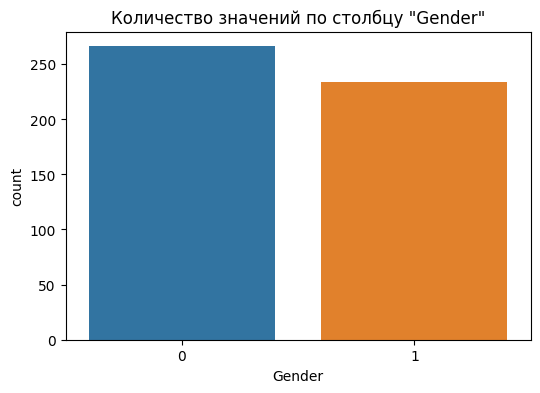

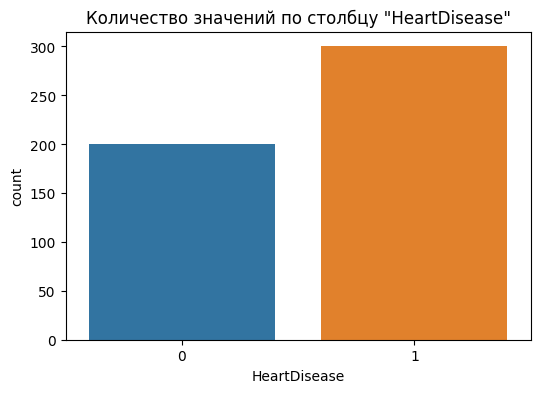

In [6]:
for col in categorical_variable:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Количество значений по столбцу "{col}"')
    plt.xlabel(col)
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


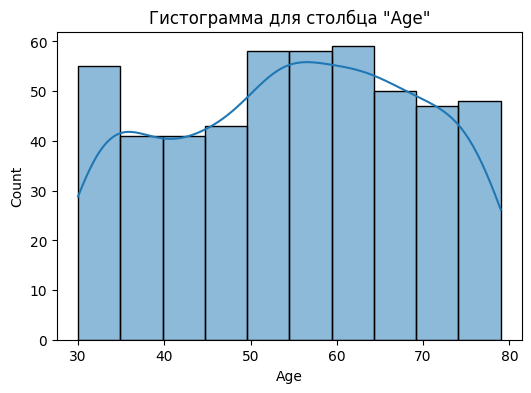

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


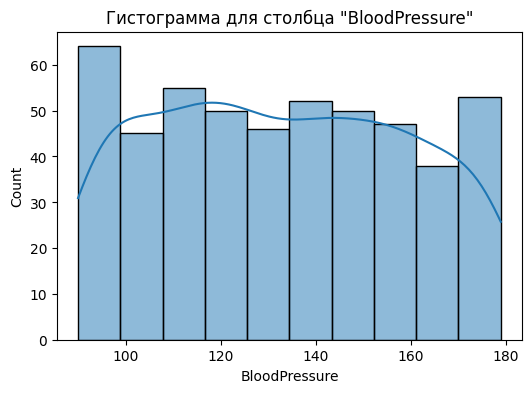

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


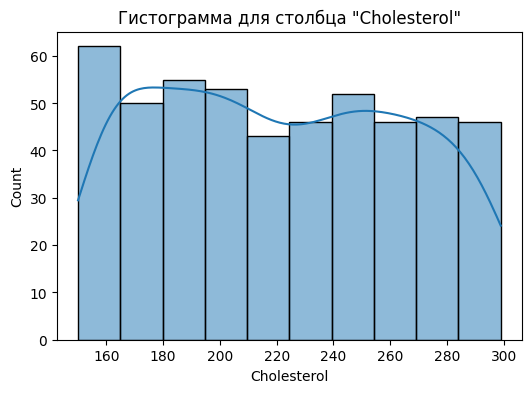

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


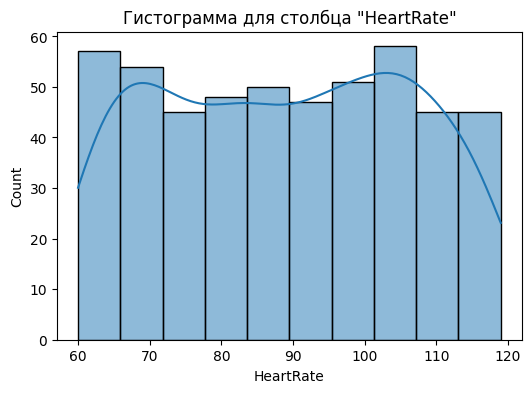

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


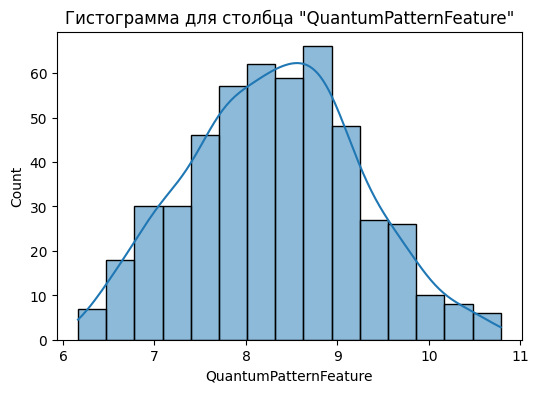

In [7]:
for col in continuous_variable:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=df[col],kde=True)
    plt.title(f'Гистограмма для столбца "{col}"')
    plt.xlabel(col)
    plt.show()

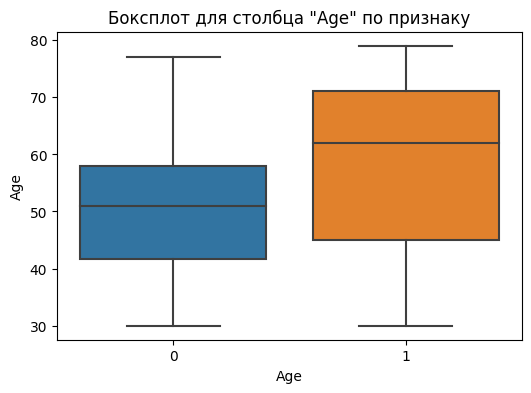

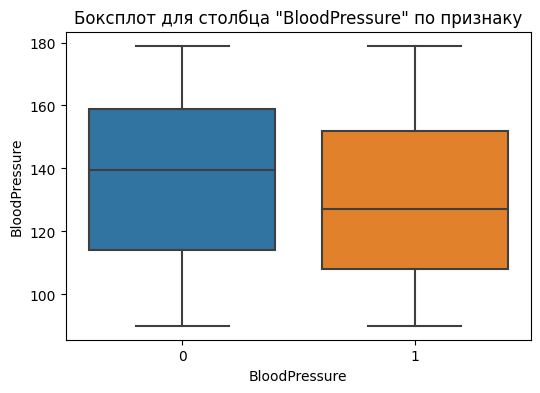

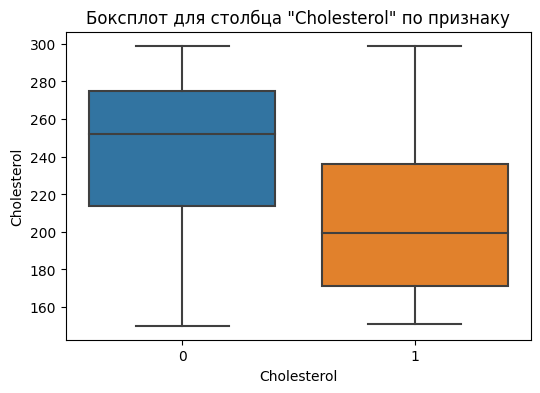

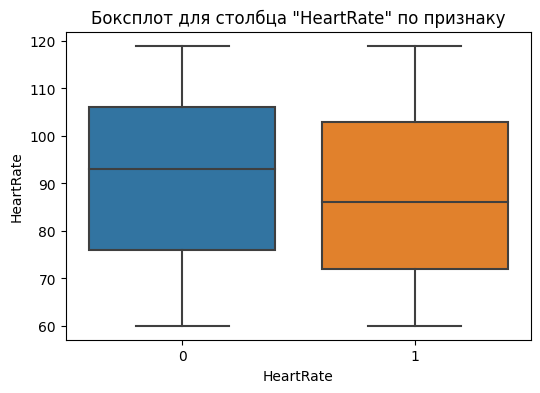

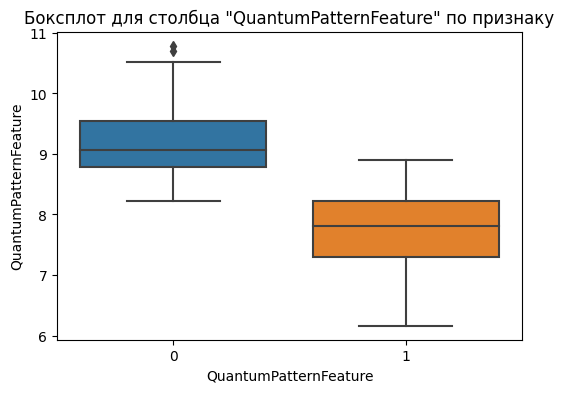

In [8]:

for col in continuous_variable:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col],x='HeartDisease',data=df)
    plt.title(f'Боксплот для столбца "{col}" по признаку')
    plt.xlabel(col)
    plt.show()

In [9]:
df.corr()['HeartDisease'].sort_values(ascending=True)

QuantumPatternFeature   -0.775160
Cholesterol             -0.423530
BloodPressure           -0.116973
HeartRate               -0.102720
Gender                  -0.011454
Age                      0.258298
HeartDisease             1.000000
Name: HeartDisease, dtype: float64

<Axes: >

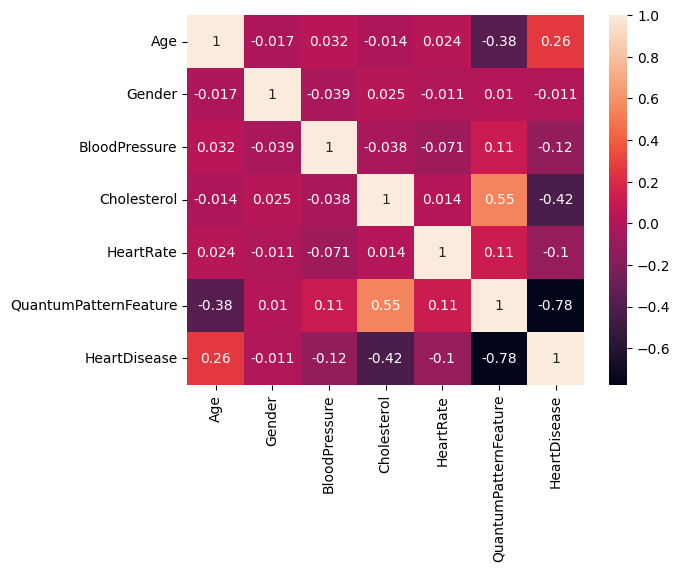

In [10]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

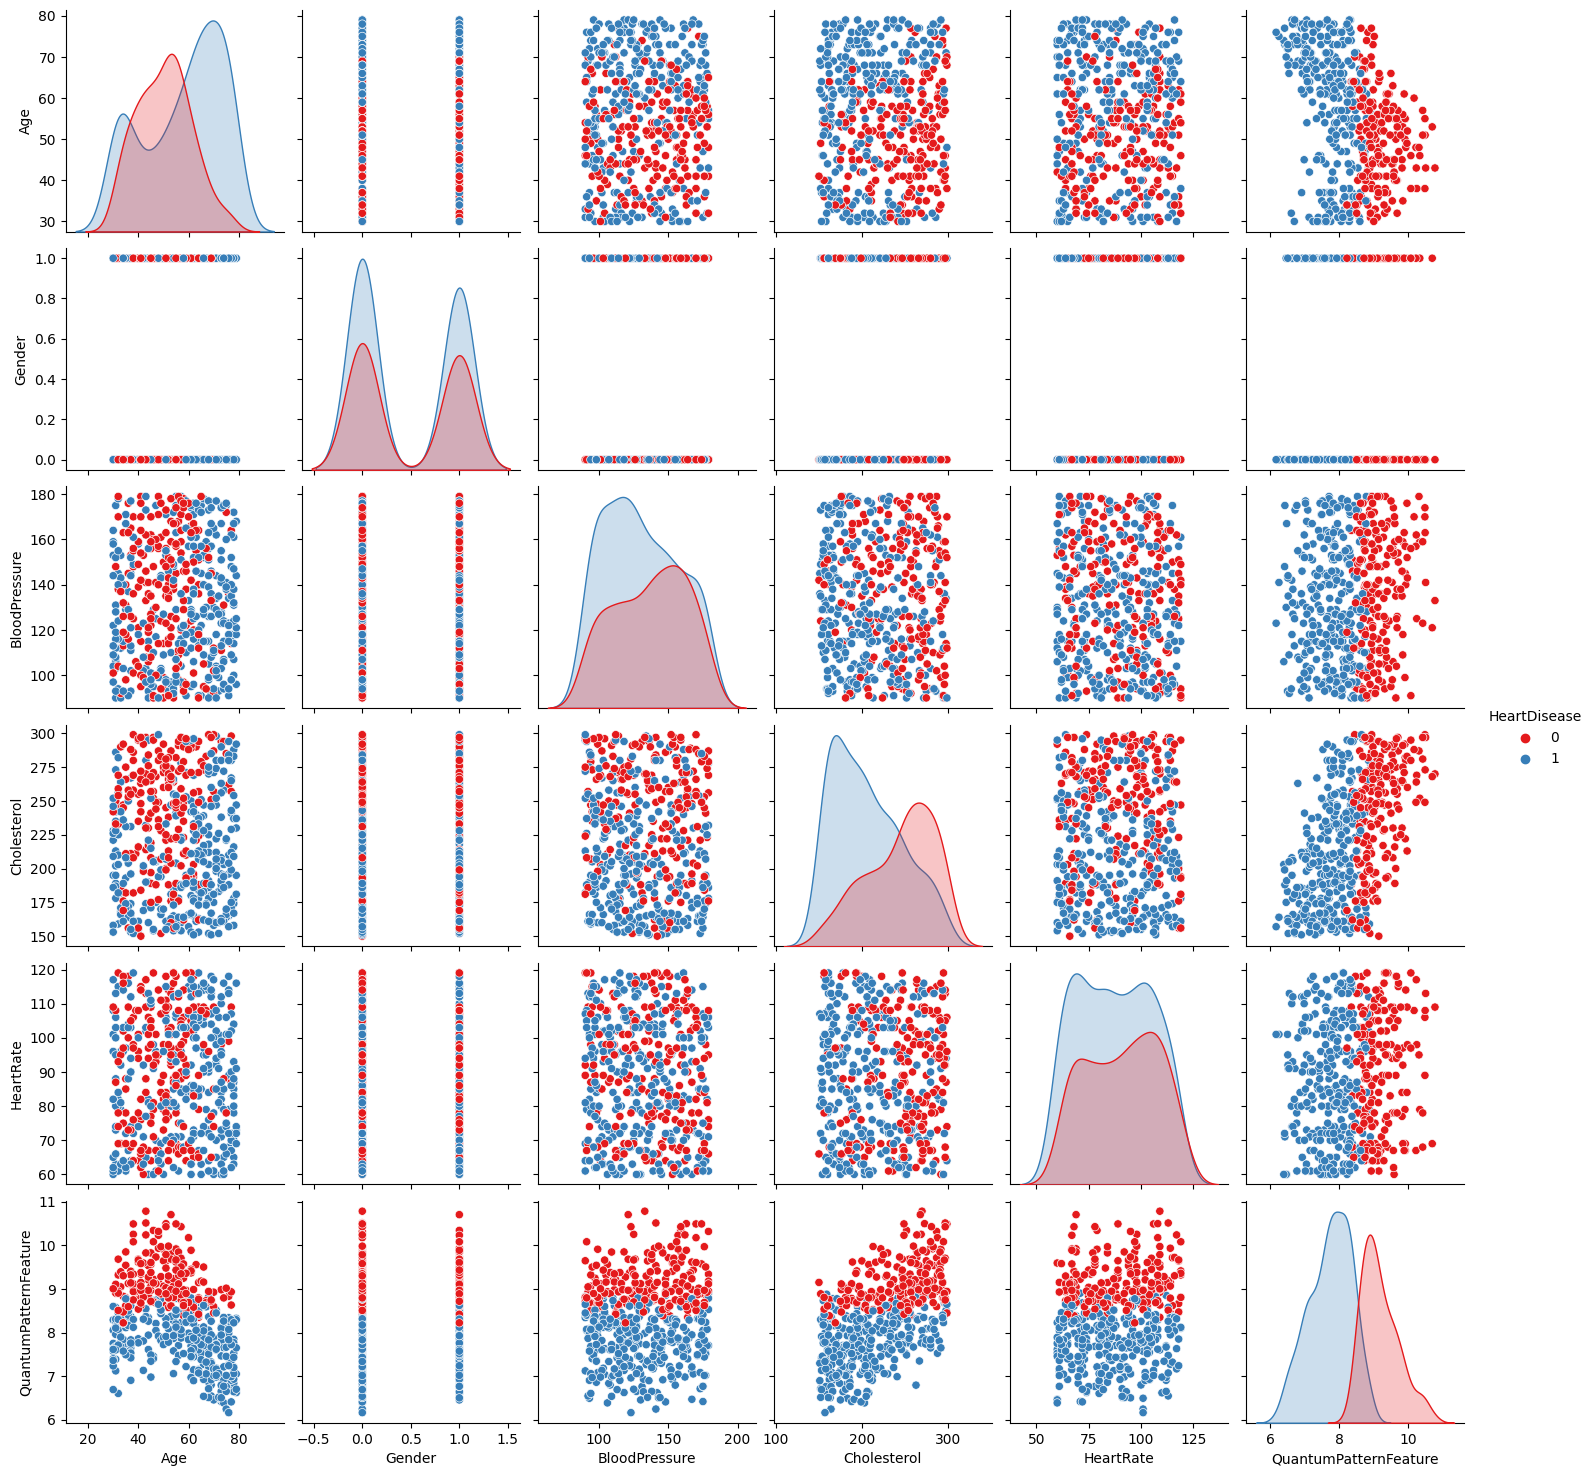

In [11]:
sns.pairplot(data=df,hue='HeartDisease',palette='Set1')

In [12]:
X = df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
#Функция принимает обученную на тренировочных данных модель и строит classification report и confusionMatrix на тестовых данных
def report(model):
    preds = model.predict(scaled_X_test)
    print(classification_report(y_test,preds))
    cm = confusion_matrix(y_test,preds)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

LogisticRegression MODEL
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.92      0.96        60

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



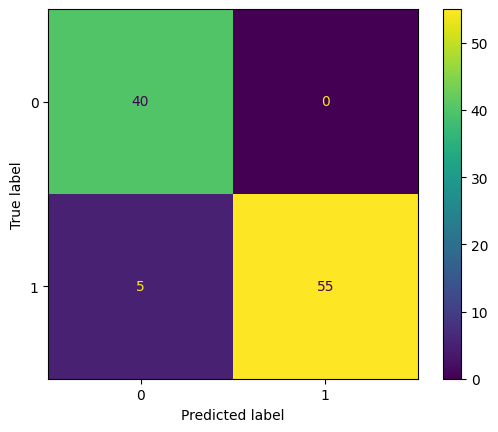

In [16]:
log = LogisticRegression()
log.fit(scaled_X_train,y_train)
print("LogisticRegression MODEL")
report(log)

SVC MODEL
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        40
           1       1.00      0.90      0.95        60

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.95      0.94      0.94       100



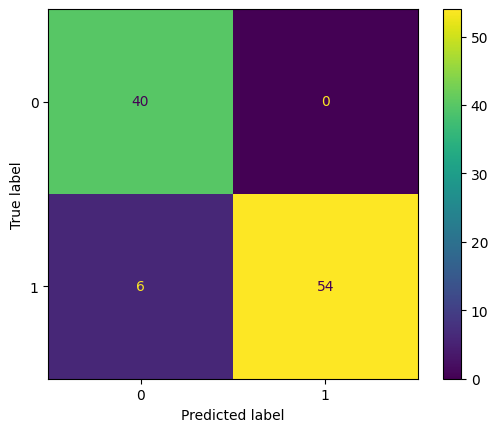

In [17]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(scaled_X_train,y_train)
print("SVC MODEL")
report(svc)

Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.93      0.87      0.90        60

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



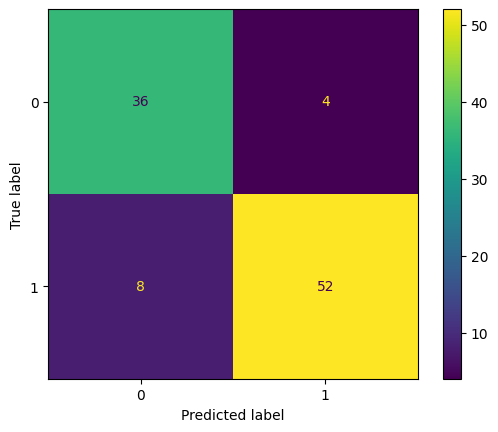

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(scaled_X_train,y_train)
print('Decision Tree')
report(dtc)

RandomForest
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        40
           1       1.00      0.90      0.95        60

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.95      0.94      0.94       100



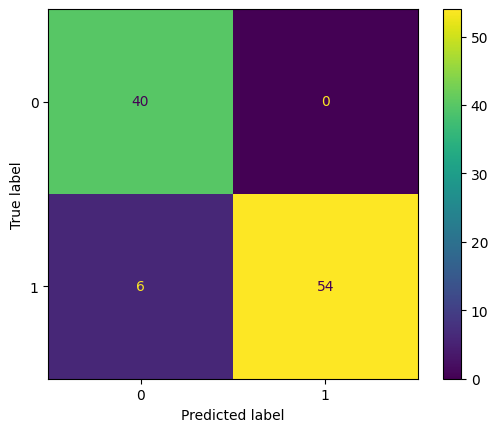

In [19]:
rfc = RandomForestClassifier()
rfc.fit(scaled_X_train,y_train)
print("RandomForest")
report(rfc)

KNeighbors
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.96      0.92      0.94        60

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



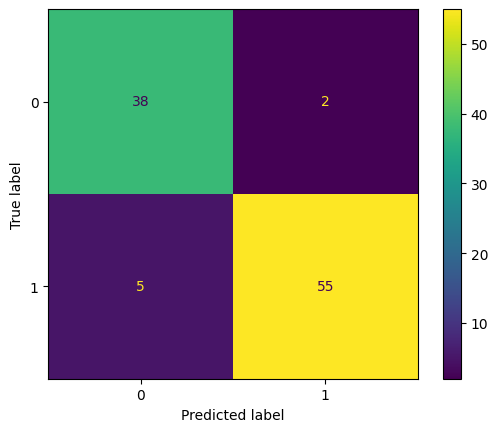

In [20]:
knn = KNeighborsClassifier()
knn.fit(scaled_X_train,y_train)
print("KNeighbors")
report(knn)